In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
from skimage.io import imread, imshow
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import data, exposure
from skimage.feature import corner_harris, corner_peaks
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

## Preprocessing: greyscale image resized to 64x64

In [29]:
def train1():
    f = open('garbage-classification/one-indexed-files-notrash_train.txt', 'r')
    train = f.readlines()
    f.close()
    img_train = []
    y_train = []
    for img_name in train:
        img_name = img_name.replace('\n', '')
        img = imageio.imread('garbage-classification/data/' +img_name.partition(' ')[0])
        grey_image = rgb2gray(img)
        image_resized = resize(grey_image, (32,32), anti_aliasing=True)
        image_flattened = image_resized.flatten()
        img_train.append(image_flattened)
        y_train.append((img_name.partition(' ')[2]))
    img_train = np.asarray(img_train)
    return img_train, y_train

In [30]:
def test1():
    f = open('garbage-classification/one-indexed-files-notrash_test.txt', 'r')
    train = f.readlines()
    f.close()
    img_train = []
    y_train = []
    for img_name in train:
        img_name = img_name.replace('\n', '')
        img = imageio.imread('garbage-classification/data/' + img_name.partition(' ')[0])
        grey_image = rgb2gray(img)
        image_resized = resize(grey_image, (32,32), anti_aliasing=True)
        image_flattened = image_resized.flatten()
        img_train.append(image_flattened)
        y_train.append((img_name.partition(' ')[2]))
    img_train = np.asarray(img_train)
    return img_train, y_train

In [31]:
x_train1,y_train1 = train1()
x_test1, y_test1 = test1()

/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3376683652.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('garbage-classification/data/' +img_name.partition(' ')[0])


0.44547563805104406
Normalized confusion matrix


/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3829371024.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(# ... and label them with the respective list entries


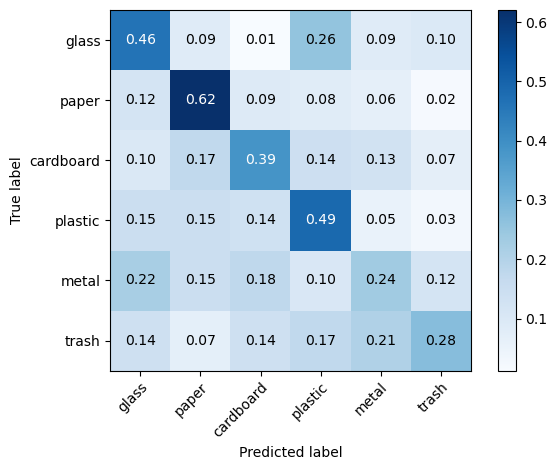

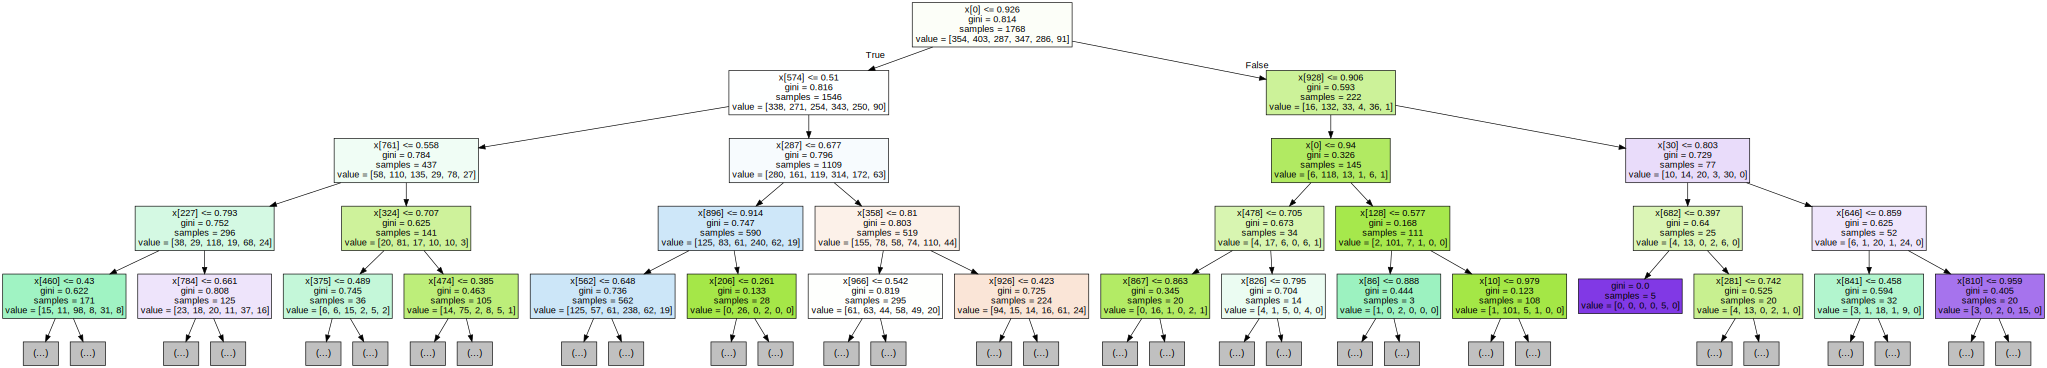

'Source.gv.pdf'

In [32]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train1, y_train1)
y_pred1 = classifier.predict(x_test1)
print(metrics.accuracy_score(y_test1, y_pred1))
generate_confusion_matrix(y_test1, y_pred1, classified_name)
plt.savefig('confusion matrix: decision tree 1')
plt.show()

graph = Source(tree.export_graphviz(classifier, out_file=None
   , filled = True, max_depth = 4))
display(SVG(graph.pipe(format='svg')))
graph.render(view=True)

0.6589327146171694
Normalized confusion matrix


/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3829371024.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(# ... and label them with the respective list entries


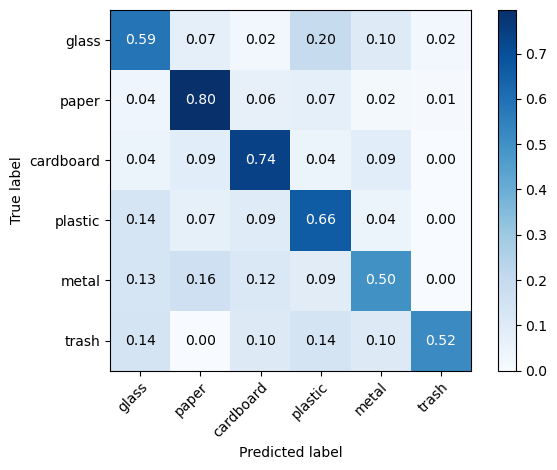

In [33]:
clf = RandomForestClassifier(n_estimators=100, max_depth=25,random_state=0)
clf.fit(x_train1, y_train1)  
y_pred1 = clf.predict(x_test1)
print(metrics.accuracy_score(y_test1, y_pred1))
generate_confusion_matrix(y_test1, y_pred1, classified_name)
plt.savefig('confusion matrix: random forest 1')
plt.show()

## Preprocessing: HOG with resized image

In [41]:
def train2():
    f = open('garbage-classification/one-indexed-files-notrash_train.txt', 'r')
    train = f.readlines()
    f.close()
    img_train = []
    y_train = []
    for img_name in train:
        img_name = img_name.replace('\n', '')
        img = imageio.imread('garbage-classification/data/' + img_name.partition(' ')[0])
        grey_image = rgb2gray(img)
        image_resized = resize(grey_image, (128,128), anti_aliasing=True)
        fd, hog_image = hog(image_resized, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)   
        image_flattened = hog_image.flatten()
        img_train.append(image_flattened)
        y_train.append((img_name.partition(' ')[2]))
    img_train = np.asarray(img_train)
    return img_train, y_train

In [42]:
def test2():
    f = open('garbage-classification/one-indexed-files-notrash_test.txt', 'r')
    train = f.readlines()
    f.close()
    img_train = []
    y_train = []
    for img_name in train:
        img_name = img_name.replace('\n', '')
        img = imageio.imread('garbage-classification/data/' + img_name.partition(' ')[0])
        grey_image = rgb2gray(img)
        image_resized = resize(grey_image, (128,128), anti_aliasing=True)
        fd, hog_image = hog(image_resized, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
        image_flattened = hog_image.flatten()
        img_train.append(image_flattened)
        y_train.append((img_name.partition(' ')[2]))
    img_train = np.asarray(img_train)
    return img_train, y_train

In [43]:
x_train2,y_train2 = train2()
x_test2, y_test2 = test2()

/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/1885851441.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('garbage-classification/data/' + img_name.partition(' ')[0])


In [44]:
classified_name = ["glass", "paper", "cardboard", "plastic", "metal", "trash"]

def generate_confusion_matrix(ground_truth, predicts, labels, cmap= plt.cm.get_cmap('Blues'), normalize=True):
  """
  Args: 
  - ground_truth: The true labels of the image set, shape=(N,1)
  - predicts: The predict labels of the image set, shape=(N,1)
  - labels: The label of your classes
  - cmap: Color map
  - normalize: Normalize the confusion matrix
  Returns:
  - ax
  """
  cm = confusion_matrix(ground_truth, predicts)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
      
  fig = plt.figure()
  ax = fig.add_subplot(111)

  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(# ... and label them with the respective list entries
          xticklabels=([''] + labels), yticklabels=([''] + labels),
          ylabel='True label',
          xlabel='Predicted label')

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  return ax

/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3829371024.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  def generate_confusion_matrix(ground_truth, predicts, labels, cmap= plt.cm.get_cmap('Blues'), normalize=True):


0.4385150812064965
Normalized confusion matrix


/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3829371024.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(# ... and label them with the respective list entries


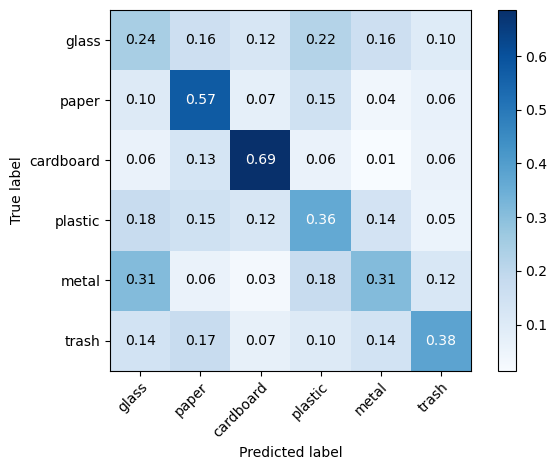

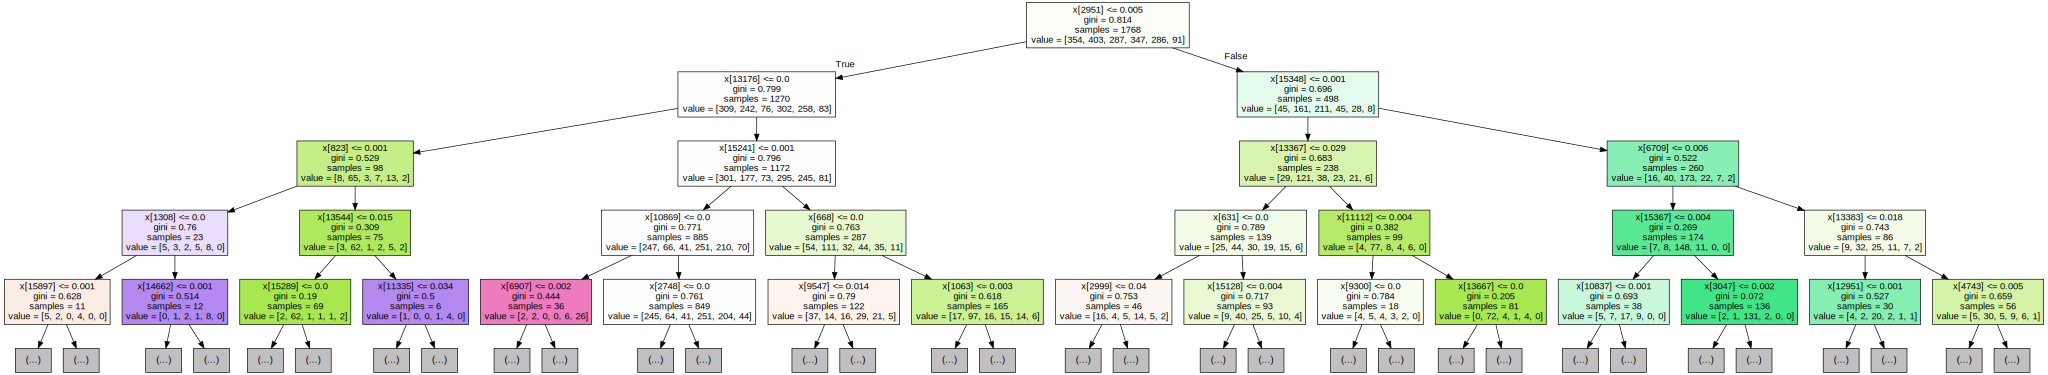

'Source.gv.pdf'

In [45]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train2, y_train2)
y_pred2 = classifier.predict(x_test2)
print(metrics.accuracy_score(y_test2, y_pred2))
generate_confusion_matrix(y_test2, y_pred2, classified_name)
plt.savefig('confusion matrix: decision tree 2')
plt.show()

graph = Source(tree.export_graphviz(classifier, out_file=None
   , filled = True, max_depth = 4))
display(SVG(graph.pipe(format='svg')))
graph.render(view=True)

0.6519721577726219
Normalized confusion matrix


/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3829371024.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(# ... and label them with the respective list entries


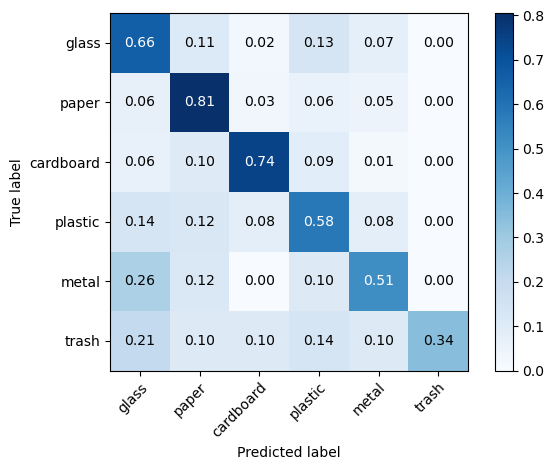

In [46]:
clf = RandomForestClassifier(n_estimators=100, max_depth=25,random_state=0)
clf.fit(x_train2, y_train2)  
y_pred2 = clf.predict(x_test2)
print(metrics.accuracy_score(y_test2, y_pred2))
generate_confusion_matrix(y_test2, y_pred2, classified_name)
plt.savefig('confusion matrix: random forest 2')
plt.show()

## Preprocessing: Corner Harris with resized image

In [55]:
def train3():
    f = open('garbage-classification/one-indexed-files-notrash_train.txt', 'r')
    train = f.readlines()
    f.close()
    img_train = []
    y_train = []
    for img_name in train:
        img_name = img_name.replace('\n', '')
        img = imageio.imread('garbage-classification/data/' + img_name.partition(' ')[0])
        grey_image = rgb2gray(img)
        image_resized = resize(grey_image, (128,128), anti_aliasing=True)
        corner_image = corner_harris(image_resized)
        image_flattened = corner_image.flatten()
        img_train.append(image_flattened)
        y_train.append((img_name.partition(' ')[2]))
    img_train = np.asarray(img_train)
    return img_train, y_train

In [56]:
def test3():
    f = open('garbage-classification/one-indexed-files-notrash_test.txt', 'r')
    train = f.readlines()
    f.close()
    img_train = []
    y_train = []
    for img_name in train:
        img_name = img_name.replace('\n', '')
        img = imageio.imread('garbage-classification/data/' + img_name.partition(' ')[0])
        grey_image = rgb2gray(img)
        image_resized = resize(grey_image, (128,128), anti_aliasing=True)
        corner_image = corner_harris(image_resized)
        image_flattened = corner_image.flatten()
        img_train.append(image_flattened)
        y_train.append((img_name.partition(' ')[2]))
    img_train = np.asarray(img_train)
    return img_train, y_train

In [57]:
x_train3,y_train3 = train3()
x_test3, y_test3 = test3()

/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/775429161.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('garbage-classification/data/' + img_name.partition(' ')[0])


0.4222737819025522
Normalized confusion matrix


/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3829371024.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(# ... and label them with the respective list entries


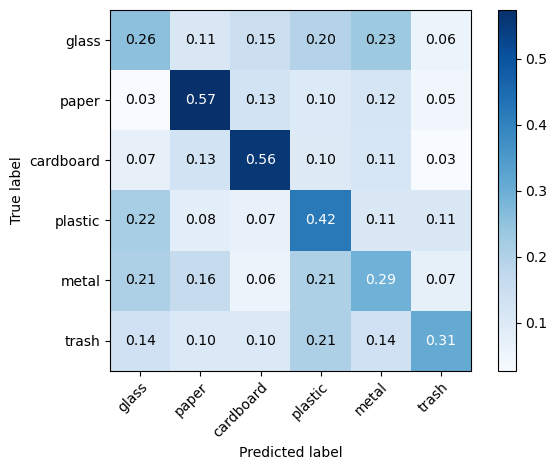

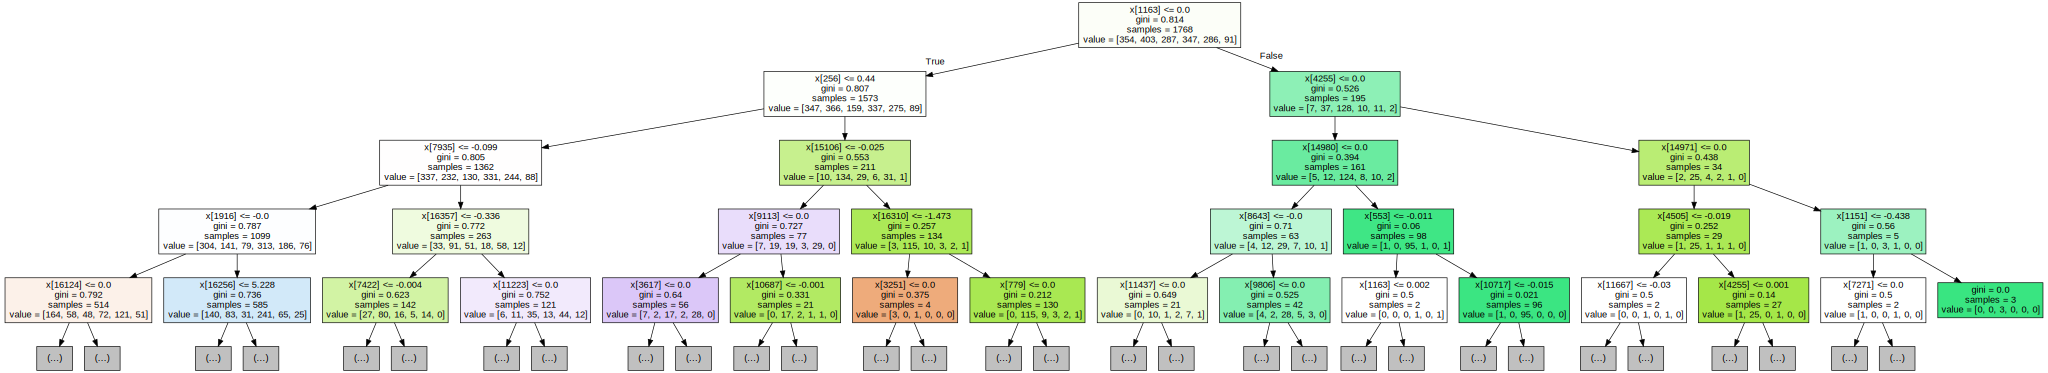

'Source.gv.pdf'

In [58]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train3, y_train3)
y_pred3 = classifier.predict(x_test3)
print(metrics.accuracy_score(y_test3, y_pred3))
generate_confusion_matrix(y_test3, y_pred3, classified_name)
plt.savefig('confusion matrix: decision tree 3')
plt.show()

graph = Source(tree.export_graphviz(classifier, out_file=None
   , filled = True, max_depth = 4))
display(SVG(graph.pipe(format='svg')))
graph.render(view=True)

0.6890951276102089
Normalized confusion matrix


/var/folders/d1/j1s4_pjx4rd73zm6h3k5jgdm0000gn/T/ipykernel_91816/3829371024.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(# ... and label them with the respective list entries


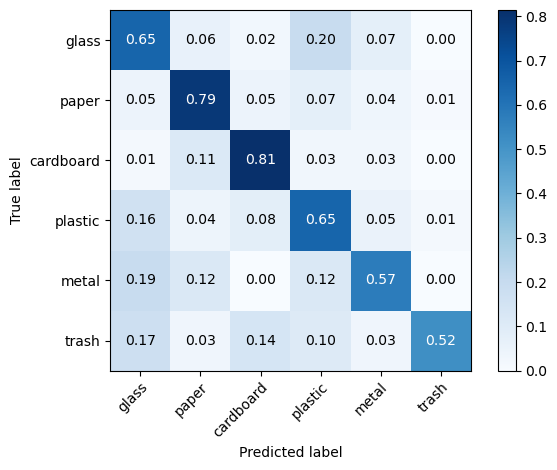

In [59]:
clf = RandomForestClassifier(n_estimators=100, max_depth=25,random_state=0)
clf.fit(x_train3, y_train3)  
y_pred3 = clf.predict(x_test3)
print(metrics.accuracy_score(y_test3, y_pred3))
generate_confusion_matrix(y_test3, y_pred3, classified_name)
plt.savefig('confusion matrix: random forest 3')
plt.show()

import joblib
model_filename = 'random_forest_model.pkl'
joblib.dump(clf, model_filename);

In [6]:
classified_name = ["glass", "paper", "cardboard", "plastic", "metal", "trash"]

def generate_confusion_matrix(ground_truth, predicts, labels, cmap= plt.cm.get_cmap('Blues'), normalize=True):
  """
  Args: 
  - ground_truth: The true labels of the image set, shape=(N,1)
  - predicts: The predict labels of the image set, shape=(N,1)
  - labels: The label of your classes
  - cmap: Color map
  - normalize: Normalize the confusion matrix
  Returns:
  - ax
  """
  cm = confusion_matrix(ground_truth, predicts)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
      
  fig = plt.figure()
  ax = fig.add_subplot(111)

  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(# ... and label them with the respective list entries
          xticklabels=([''] + labels), yticklabels=([''] + labels),
          ylabel='True label',
          xlabel='Predicted label')

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  return ax